# Multilinear Regression -Startup dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\delll\Desktop\Python\DataSets\Datasets_MLR\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape
# rows=50 and columns=5

(50, 5)

In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [49]:
df=df.rename(columns={'R&D Spend':'Research','Marketing Spend':'Marketing'})

In [50]:
df.dtypes

Research          float64
Administration    float64
Marketing         float64
State              object
Profit            float64
dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Research        50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [52]:
df.isnull().sum()
# no null record

Research          0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [53]:
df.describe()

,Research,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112032.977000
std,45902.256482,28017.802755,122290.310726,40256.292081
min,0.000000,51283.140000,0.000000,15698.290000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Univariate Analysis

In [54]:
df["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

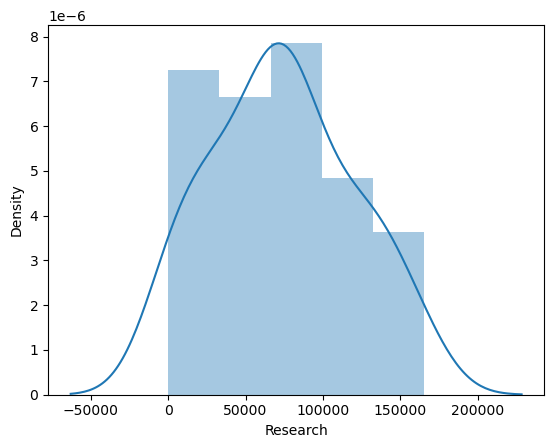

In [56]:
sns.distplot(df["Research"])
plt.show()
# Data is right skewed

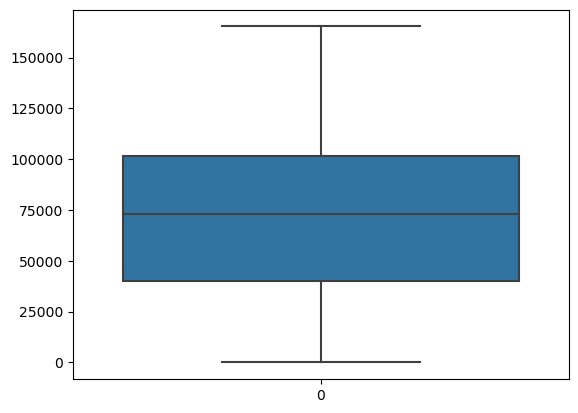

In [57]:
sns.boxplot(df["Research"])
plt.show()

In [ ]:
sns.distplot(df["Administration"])
plt.show()
# Data is left skewed

In [ ]:
sns.boxplot(df["Administration"])
plt.show()
# Data is left skewed

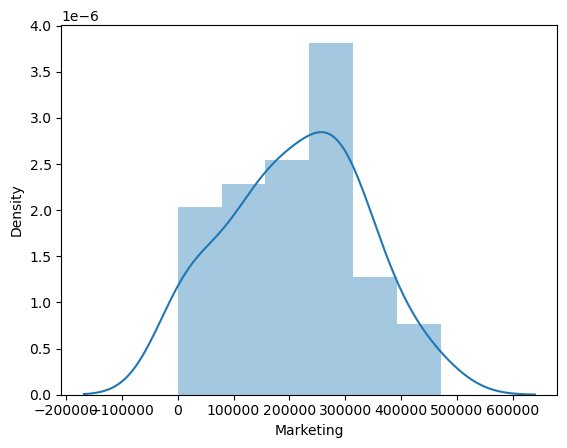

In [58]:
sns.distplot(df["Marketing"])
plt.show()
# Data is right skewed

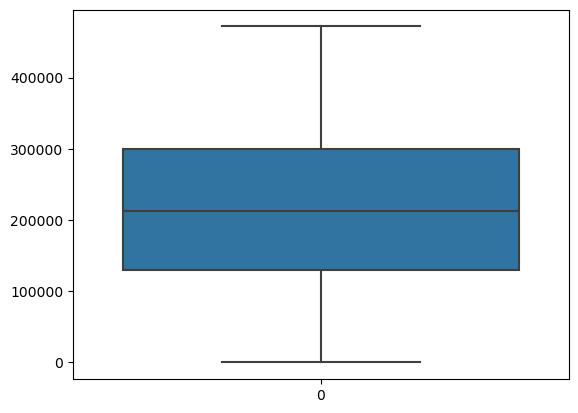

In [59]:
sns.boxplot(df["Marketing"])
plt.show()
# Data is right skewed

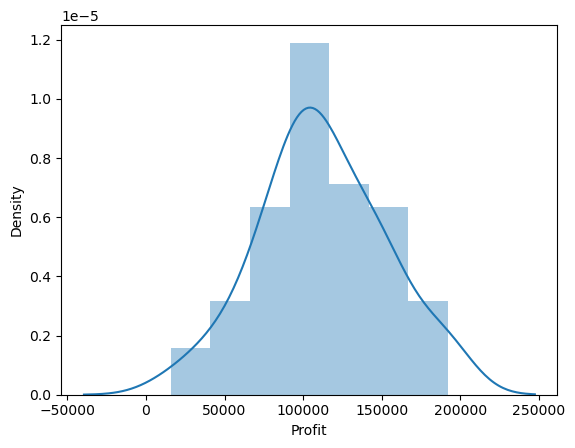

In [60]:
sns.distplot(df["Profit"])
plt.show()
# Data is normally distributed

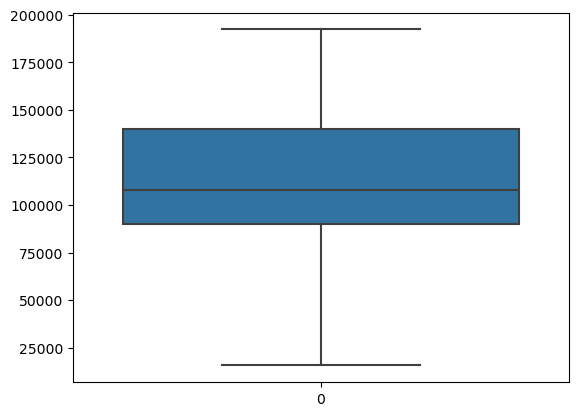

In [61]:
sns.boxplot(df["Profit"])
plt.show()
# it has one outlier

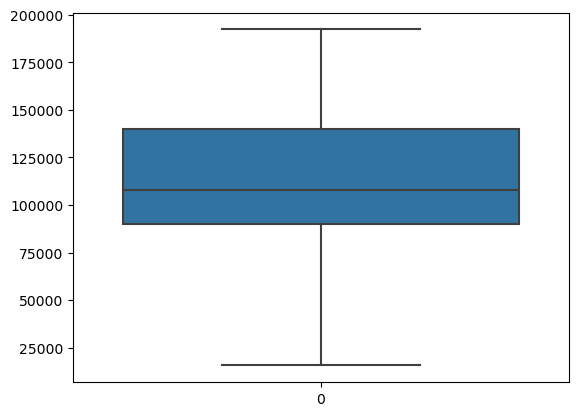

In [62]:
# use winsorize to remove outliers
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Profit",tail="both")
df["Profit"]=winsor.fit_transform(df[["Profit"]])
sns.boxplot(df["Profit"])
plt.show()

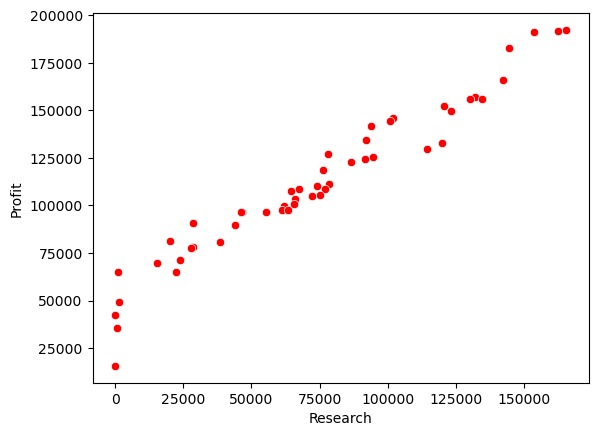

In [63]:
sns.scatterplot(x=df["Research"],y=df["Profit"],color="r")
plt.show()

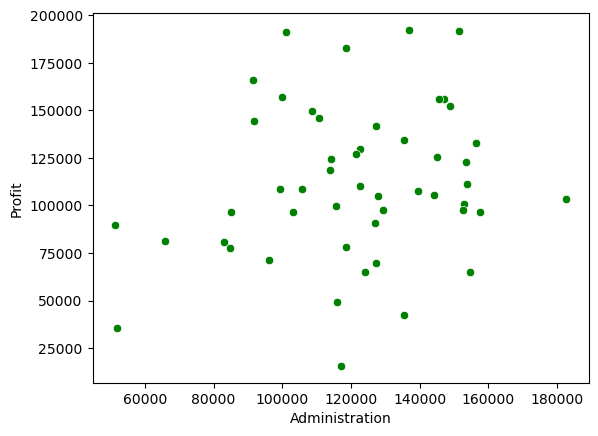

In [24]:
sns.scatterplot(x=df["Administration"],y=df["Profit"],color="g")
plt.show()

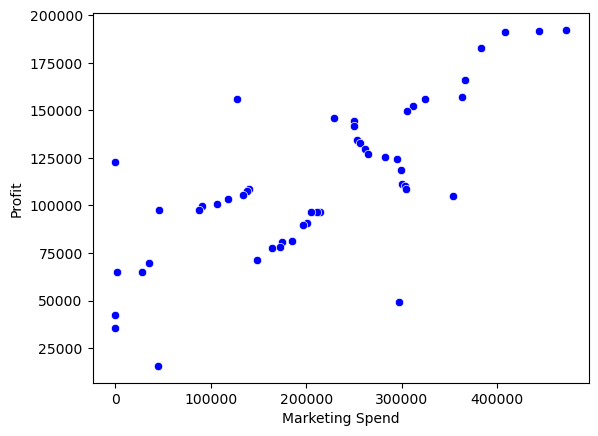

In [26]:
sns.scatterplot(x=df["Marketing"],y=df["Profit"],color="b")
plt.show()

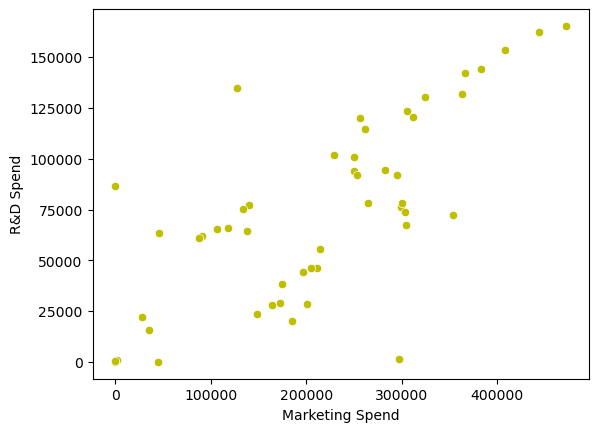

In [31]:
sns.scatterplot(x=df["Marketing"],y=df["Research"],color="y")
plt.show()

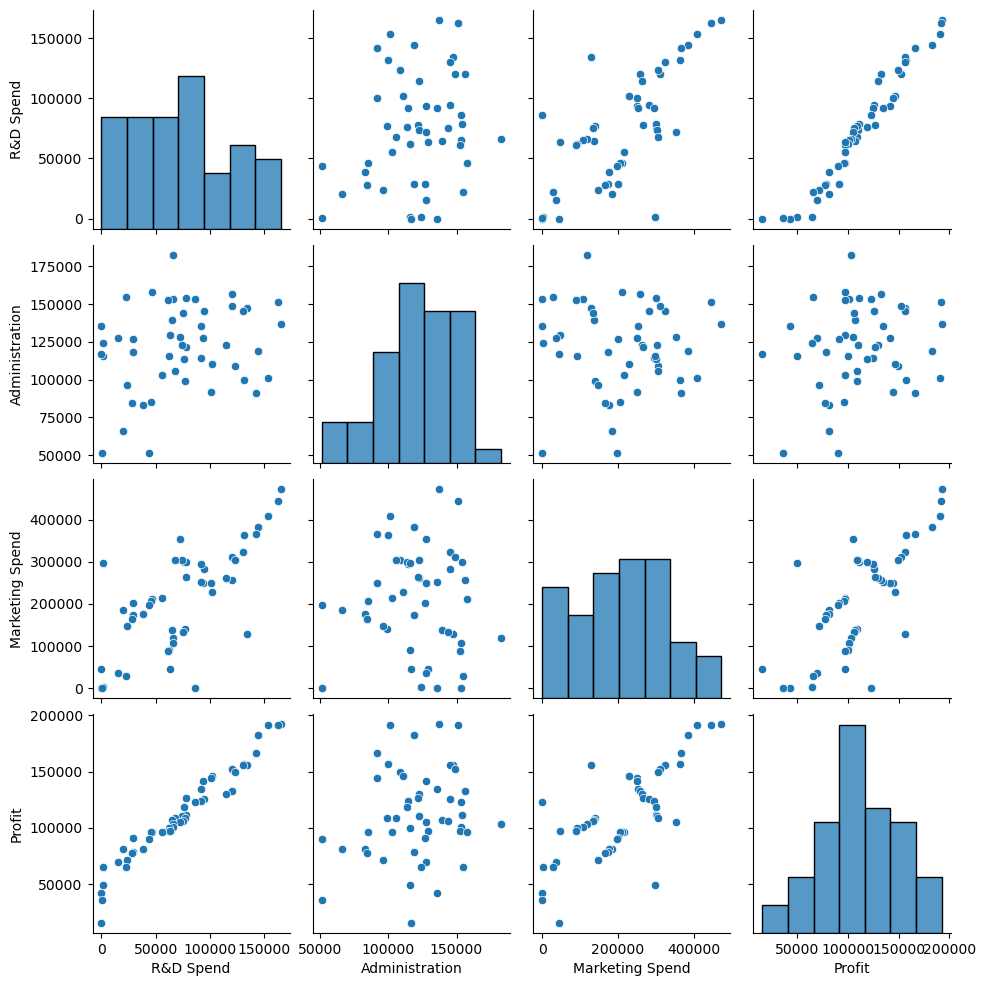

In [28]:
sns.pairplot(df)
plt.show()

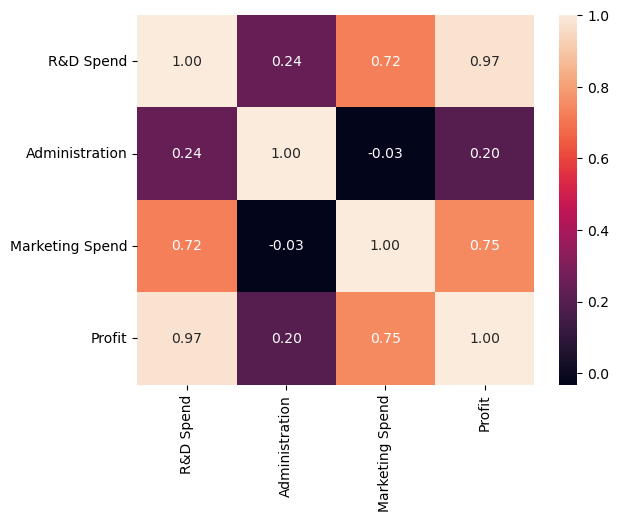

In [29]:
sns.heatmap(df.corr(),annot=True,fmt="0.02f")
plt.show()

In [32]:
# research and development spend and profit have strong positive correlation.
# research and development spend and markting spend have weak positive correlation.
# Marketing spend and profit have weak positive correlation.
# administration is independent feature.

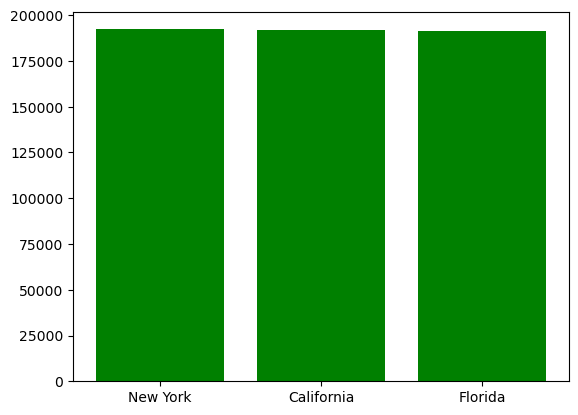

In [64]:
plt.bar(x=df["State"],height=df["Profit"],color="g")
plt.show()

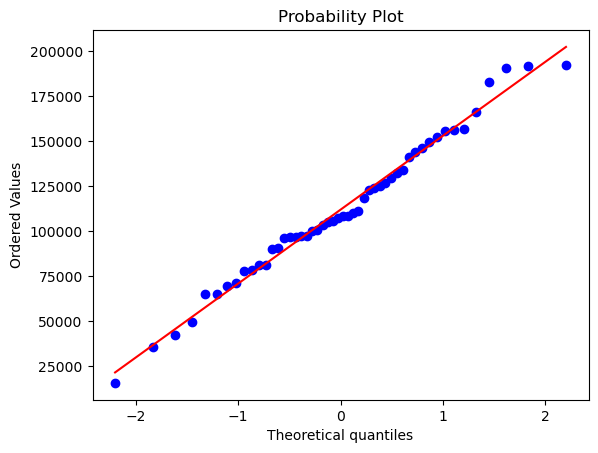

In [65]:
from scipy import stats
import pylab
stats.probplot(df.Profit, dist = "norm", plot = pylab)
plt.show()
# Data is normallly distributed

In [66]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
first_model = smf.ols('Profit ~Research + Administration+ Marketing', data = df).fit() # regression model


In [67]:
# Summary
first_model.summary()
# R-squared: 0.951,p-values for administration is 0.602 more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     300.6
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.22e-30
Time:                        22:04:19   Log-Likelihood:                -524.95
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.019e+04   6515.750      7.702      0.000    3.71e+04    6.33e+04
Research           0.8051      0.045     17.987      0.000       0.715       0.895
Administration    -0.0267      0.051     -0.528      0.600      -0.129       0.075
Marketing          0.0272      0.016      1.666      0.103      -0.006       0.060
==============================================================================
Omnibus:                       13.316   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.761
Skew:                          -0.888   Prob(JB):                     0.000139
Kurtosis:                       5.317   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

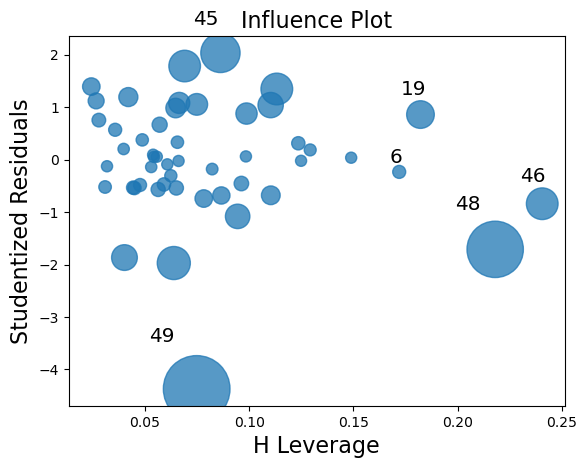

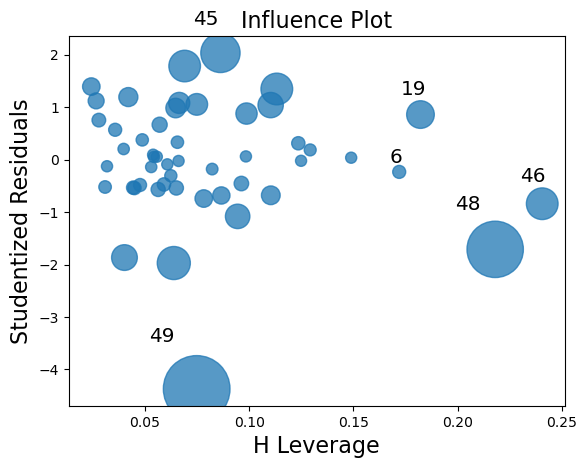

In [68]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(first_model)
# Studentized Residuals = Residual/standard deviation of residuals
# index 49 is showing high influence so we can exclude that entire row

In [69]:
df_new = df.drop(df.index[[49]])

In [71]:
# Preparing model                  
first_model_new = smf.ols('Profit ~Research + Administration+ Marketing', data = df_new).fit()    

# Summary
first_model_new.summary()
# There is no change in p value of administration

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           8.85e-32
Time:                        22:07:22   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
Research           0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing          0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF should not be > 10 = colinearity
# calculating VIF's values of independent variables
rsq_research = smf.ols('Research ~ Administration +Marketing', data = df).fit().rsquared  
vif_research = 1/(1 - rsq_research) 

In [74]:
rsq_administration = smf.ols('Administration ~ Research +Marketing', data = df).fit().rsquared  
vif_administration = 1/(1 - rsq_administration)

rsq_marketing = smf.ols('Marketing ~Research +Administration', data = df).fit().rsquared  
vif_marketing = 1/(1 - rsq_marketing) 

In [75]:
# Storing vif values in a data frame
d1 = {'Variables':['Research', 'Administration', 'Marketing',], 'VIF':[vif_research, vif_administration, vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# All are having less than 10 VIF value
# let us go for transformation

,Variables,VIF
0,Research,2.468903
1,Administration,1.175091
2,Marketing,2.326773


In [76]:
new_admin=np.log(df['Administration'])

In [78]:
# Final model
trans_model = smf.ols('Profit ~ Research +new_admin + Marketing', data = df).fit()
trans_model.summary() 
##New_admin has p value=0.689 which is not improved hence Administration feature has to be droped

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     299.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.42e-30
Time:                        22:13:51   Log-Likelihood:                -525.02
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.168e+04   6.15e+04      1.165      0.250   -5.22e+04    1.96e+05
Research       0.8026      0.044     18.039      0.000       0.713       0.892
new_admin  -2120.0833   5293.308     -0.401      0.691   -1.28e+04    8534.794
Marketing      0.0281      0.016      1.749      0.087      -0.004       0.061
==============================================================================
Omnibus:                       13.009   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.121
Skew:                          -0.874   Prob(JB):                     0.000191
Kurtosis:                       5.272   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Prediction
final_ml = smf.ols('Profit ~ Research + Marketing', data = df).fit()
final_ml.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     457.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.52e-31
Time:                        22:15:22   Log-Likelihood:                -525.10
No. Observations:                  50   AIC:                             1056.
Df Residuals:                      47   BIC:                             1062.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.705e+04   2666.828     17.644      0.000    4.17e+04    5.24e+04
Research       0.7960      0.041     19.418      0.000       0.714       0.878
Marketing      0.0298      0.015      1.939      0.058      -0.001       0.061
==============================================================================
Omnibus:                       13.151   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.492
Skew:                          -0.878   Prob(JB):                     0.000159
Kurtosis:                       5.305   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
pred = final_ml.predict(df)
# R sqaure value is 0.95 and p values are in the range

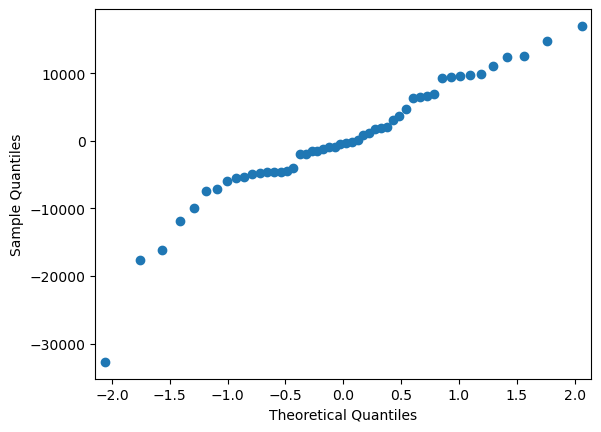

In [81]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

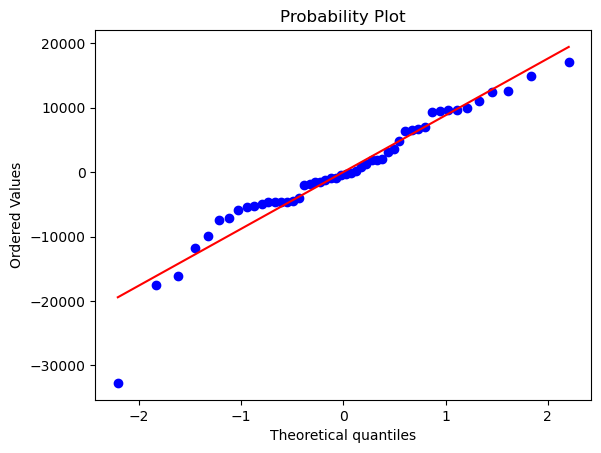

In [82]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

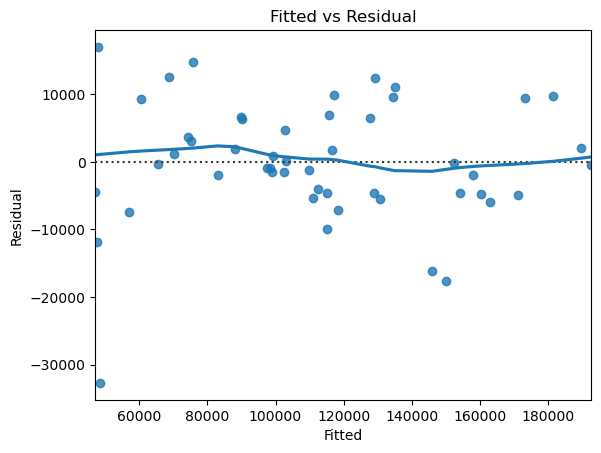

In [83]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = df.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

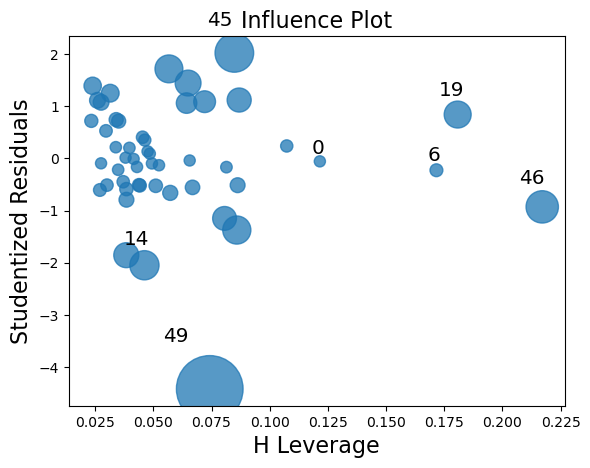

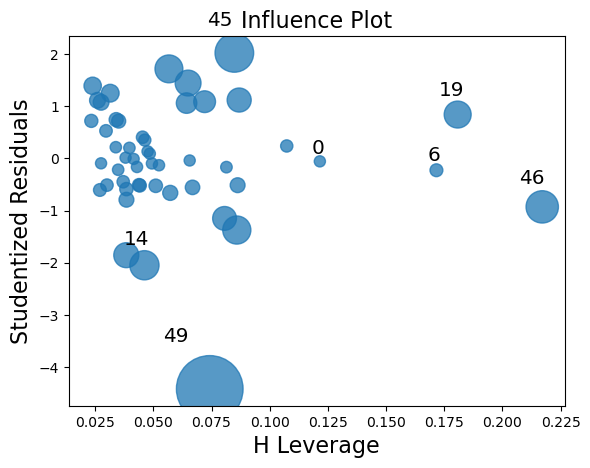

In [84]:
sm.graphics.influence_plot(final_ml)

In [85]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2) # 20% test data

In [86]:
# preparing the model on train data 
model_train = smf.ols('Profit ~ Research + Marketing', data = df_train).fit()

In [87]:
# prediction on test data set 
test_pred = model_train.predict(df_test)

In [88]:
# test residual values 
test_errors = test_pred - df_test.Profit
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_errors * test_errors))
test_rmse

9881.333648936929

In [89]:
# train_data prediction
train_pred = model_train.predict(df_train)

In [90]:
# train residual values 
train_resid  = train_pred - df_train.Profit
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

8595.452268965406